# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Data Tasks:

Goal: To determine the best parameters that will be used in creating an optimum model that will predict the appropriate value for used cars

**Low Level Details**


- Understanding the data
    - Generic Data Analysis steps
    - Data Sanitation
        - Imputation, Drop, Transformation/Encoding, Standardization, etc.
- Determine the best parameters that will represent the value of the car
    - Using different feature selection schemes
        - SFS, IVF, Lasso, Heatmaps, etc.
    - In effect, this will be a Regression problem
        - The use of Linear/Ridge/Lasso Regression will be considered
- Determine the best hyperparameters and ultimately the best model via computer validation scores
    - Interating/Experimenting with different types of estimators (LinearRegression, Ridge, Lasso)
    - Use of functions such as PolynomialFeatures, etc.
    - Using GridSearchCV to automate this process
- Determine the best validation scheme to score the model
    - MSE, MAE, and/or RMSE

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

- Understanding the data
    - Generic Data Analysis steps
        - Visualization
    - PCA/Clustering
    - Data Sanitation
        - Imputation, Drop, Transformation/Encoding, Standardization, etc.

In [954]:
#Data Analysis
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


#Input
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
## Add other input validators here...

#Tools
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

#Transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
import category_encoders as ce
## Add more transformers here....

#Estimators
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#Evaluation
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, r2_score, explained_variance_score
## Add Validation methods here....


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge


import time
import warnings
from sklearn.model_selection import KFold

In [955]:
#Import data
df = pd.read_csv('data/vehicles.csv')

In [956]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [957]:
df.shape

(426880, 18)

In [958]:
df.isnull().sum().sort_values()

id                   0
price                0
state                0
region               0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
dtype: int64

In [959]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [960]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [961]:
#Auto convert to appropriate data type
df_1_dtypeconv = df.convert_dtypes()
df_1_dtypeconv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426880 non-null  Int64 
 1   region        426880 non-null  string
 2   price         426880 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426880 non-null  string
dtypes: Int64(4), string(14)


In [962]:
#Review Categorical values
df_1_dtypeconv.describe(include=['string'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [963]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [964]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [965]:
np.unique(df.query('VIN == "1FMJU1JT1HEA52352"')['price'])

## Based on this, Region/State is not a useful factor for pricing

array([29590], dtype=int64)

In [966]:
df.query('VIN == "1FMJU1JT1HEA52352"')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
76,7311818189,auburn,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
707,7311865995,birmingham,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
1935,7311801032,dothan,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
2201,7311915565,florence / muscle shoals,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
2377,7311823034,gadsden-anniston,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420611,7311842926,madison,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi
423786,7311784162,milwaukee,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi
425368,7311832579,sheboygan,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi
425834,7311967545,wausau,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi


In [967]:
#Noticed data duplication due to VIN
## Note: VIN is unique per vehicle...
df_2_check_duplication = df[['price', 'year', 'manufacturer', 'model', 'condition', 'fuel', 'odometer', 'title_status', 'transmission', 'drive','size','type', 'paint_color']]
not_duplicates = ~df_2_check_duplication.duplicated()
not_duplicates.value_counts()

## NaN values for the df_2_check_duplication are already considered in this 


True     248099
False    178781
dtype: int64

In [968]:
#Mask created above to filter non-duplicated records (248099)
df_3_nodup = df[not_duplicates]
df_3_nodup


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy
426838,7302198494,wyoming,21900,1920.0,NaN,Paige Glenbrook Touring,good,6 cylinders,gas,11065.0,clean,manual,NaN,rwd,full-size,other,black,wy
426839,7302191669,wyoming,54999,2017.0,NaN,2017,NaN,NaN,gas,119000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426846,7302118268,wyoming,41999,2015.0,NaN,2015,NaN,NaN,gas,126000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy


In [969]:
#Note that the original data is 426880
#After removing duplicates, new data is 248099 

print(f'Data loss: \n\nRecord Removed: {426880-248099} \nPercentage Removed: {((426880-248099)/426880)*100}')

Data loss: 

Record Removed: 178781 
Percentage Removed: 41.88085644677661


#### Note:
Duplicate data can have both positive and negative effects on training a model, depending on the nature of the data and the type of model being used.

On the positive side, duplicate data can provide additional examples of patterns and relationships within the data, potentially leading to a more robust and accurate model. In some cases, duplicate data can also help to balance class frequencies, making the model less biased towards one class over another.

On the negative side, duplicate data can lead to overfitting, where the model becomes too specialized to the training data and performs poorly on new, unseen data. Duplicate data can also slow down training time and increase the memory requirements of the model.

Therefore, it is generally a good practice to identify and remove duplicate data before training a model, unless there is a specific reason to include duplicate data in the training set. 

#### Initial review (Data to separate/drop)



**Target**
- price

**Unimportant Columns/Features**
- id, region, state

**Semi-important Columns/Features to review but to remove**
- VIN

**Feature with excessive NaN entries**
- size

**Feature with excessive feature values**
- model

In [970]:
df_3_nodup = df_3_nodup.convert_dtypes()
df_3_nodup.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426833,7302338378,wyoming,6800,1997,jaguar,xk8 convertible,good,8 cylinders,gas,69550,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy
426838,7302198494,wyoming,21900,1920,<NA>,Paige Glenbrook Touring,good,6 cylinders,gas,11065,clean,manual,<NA>,rwd,full-size,other,black,wy
426839,7302191669,wyoming,54999,2017,<NA>,2017,<NA>,<NA>,gas,119000,clean,automatic,<NA>,<NA>,<NA>,<NA>,<NA>,wy
426846,7302118268,wyoming,41999,2015,<NA>,2015,<NA>,<NA>,gas,126000,clean,automatic,<NA>,<NA>,<NA>,<NA>,<NA>,wy
426873,7301591202,wyoming,30990,2018,mercedes-benz,glc 300 sport,good,<NA>,gas,15080,clean,automatic,WDC0G4JB6JV019749,rwd,<NA>,other,white,wy


In [971]:
df_3_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248099 entries, 0 to 426873
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            248099 non-null  Int64 
 1   region        248099 non-null  string
 2   price         248099 non-null  Int64 
 3   year          247404 non-null  Int64 
 4   manufacturer  237252 non-null  string
 5   model         244406 non-null  string
 6   condition     149180 non-null  string
 7   cylinders     158769 non-null  string
 8   fuel          246392 non-null  string
 9   odometer      245576 non-null  Int64 
 10  title_status  243893 non-null  string
 11  transmission  246741 non-null  string
 12  VIN           126183 non-null  string
 13  drive         177515 non-null  string
 14  size          87617 non-null   string
 15  type          185553 non-null  string
 16  paint_color   173464 non-null  string
 17  state         248099 non-null  string
dtypes: Int64(4), string(14)


In [972]:
df_3_nodup.isnull().sum().sort_values()

id                   0
price                0
state                0
region               0
year               695
transmission      1358
fuel              1707
odometer          2523
model             3693
title_status      4206
manufacturer     10847
type             62546
drive            70584
paint_color      74635
cylinders        89330
condition        98919
VIN             121916
size            160482
dtype: int64

In [973]:
#Reviewing Size
df_3_nodup.describe(include=['string'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,248099,237252,244406,149180,158769,246392,243893,246741,126183,177515,87617,185553,173464,248099
unique,404,42,29649,6,8,5,6,3,118006,3,4,13,12,51
top,phoenix,ford,f-150,excellent,4 cylinders,gas,clean,automatic,NM0GS9F23K1426362,4wd,full-size,sedan,white,ca
freq,2697,40714,4555,70458,56573,217840,232756,215776,18,76393,44410,51882,42659,31103


In [974]:
# Perform transformation and remove unhelpful features

df_4_init = df_3_nodup.drop(columns=["id", "region", "state", "VIN"]) #14 Features left
df_4_init.tail()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
426833,6800,1997,jaguar,xk8 convertible,good,8 cylinders,gas,69550,clean,automatic,rwd,compact,convertible,white
426838,21900,1920,<NA>,Paige Glenbrook Touring,good,6 cylinders,gas,11065,clean,manual,rwd,full-size,other,black
426839,54999,2017,<NA>,2017,<NA>,<NA>,gas,119000,clean,automatic,<NA>,<NA>,<NA>,<NA>
426846,41999,2015,<NA>,2015,<NA>,<NA>,gas,126000,clean,automatic,<NA>,<NA>,<NA>,<NA>
426873,30990,2018,mercedes-benz,glc 300 sport,good,<NA>,gas,15080,clean,automatic,rwd,<NA>,other,white


In [975]:
df_4_init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248099 entries, 0 to 426873
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         248099 non-null  Int64 
 1   year          247404 non-null  Int64 
 2   manufacturer  237252 non-null  string
 3   model         244406 non-null  string
 4   condition     149180 non-null  string
 5   cylinders     158769 non-null  string
 6   fuel          246392 non-null  string
 7   odometer      245576 non-null  Int64 
 8   title_status  243893 non-null  string
 9   transmission  246741 non-null  string
 10  drive         177515 non-null  string
 11  size          87617 non-null   string
 12  type          185553 non-null  string
 13  paint_color   173464 non-null  string
dtypes: Int64(3), string(11)
memory usage: 29.1 MB


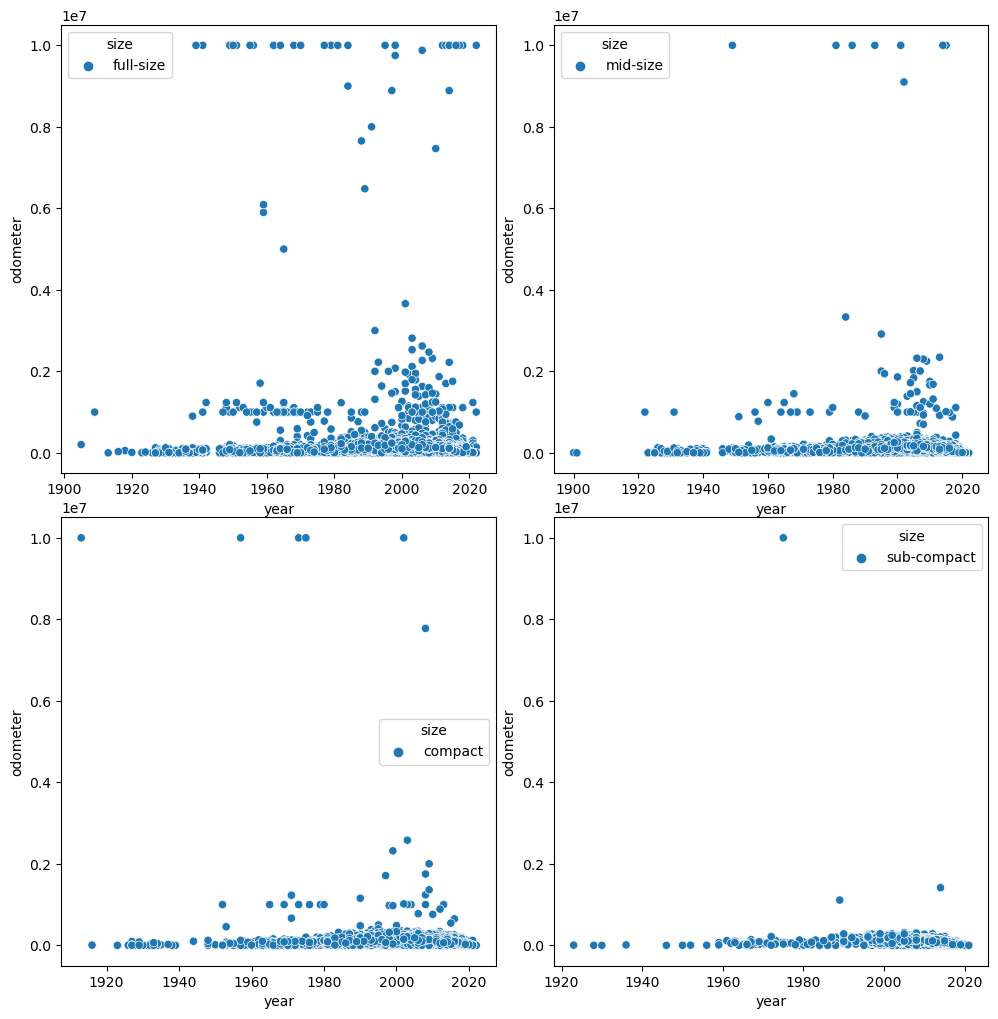

In [976]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
fig.tight_layout()
sns.scatterplot(ax = ax[0,0], data=df_4_init.query('size == "full-size"'),x='year', y='odometer', hue='size')
sns.scatterplot(ax = ax[0,1], data=df_4_init.query('size == "mid-size"'),x='year', y='odometer', hue='size')
sns.scatterplot(ax = ax[1,0], data=df_4_init.query('size == "compact"'),x='year', y='odometer', hue='size')
sns.scatterplot(ax = ax[1,1], data=df_4_init.query('size == "sub-compact"'),x='year', y='odometer', hue='size')

# Size cannot be generalized with data (numerical) below...
# Confirmed that we can drop this column..
df_4_init.drop(columns=['size'], inplace=True)

In [977]:
df_4_init.isnull().sum().sort_values()

price               0
year              695
transmission     1358
fuel             1707
odometer         2523
model            3693
title_status     4206
manufacturer    10847
type            62546
drive           70584
paint_color     74635
cylinders       89330
condition       98919
dtype: int64

In [978]:
df_4_init.shape

(248099, 13)

In [979]:
df_4_init.describe(include=['string'])

# Mode Inspection and Imputation

## Below 50k records
# price               0  # Target (N/A)
# year              695  # Impute with mode? To review
# transmission     1358  # Impute with mode
# fuel             1707  # Impute with mode
# odometer         2523  # Impute with mean? To review
# model            3693  # Drop NA
# title_status     4206  # Impute with mode
# manufacturer    10847  # Impute with mode?

# fuel,title_status, transmission, drive

print(f'Data loss if model is removed =  {(100-(100*((248099-3693)/248099))):.2f}')
print(f'Data loss if manufacturer is removed =  {(100-(100*((248099-10847)/248099))):.2f}')
#Note: There could be some data that both model and manufacturer have NaN values... percentage can be lower

df_4_init['transmission'].fillna('automatic',inplace=True)
df_4_init['fuel'].fillna('gas',inplace=True)
df_4_init['title_status'].fillna('clean',inplace=True)

Data loss if model is removed =  1.49
Data loss if manufacturer is removed =  4.37


In [980]:
df_4_init.describe(include=['string'])

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color
count,237252,244406,149180,158769,248099,248099,248099,177515,185553,173464
unique,42,29649,6,8,5,6,3,3,13,12
top,ford,f-150,excellent,4 cylinders,gas,clean,automatic,4wd,sedan,white
freq,40714,4555,70458,56573,219547,236962,217134,76393,51882,42659


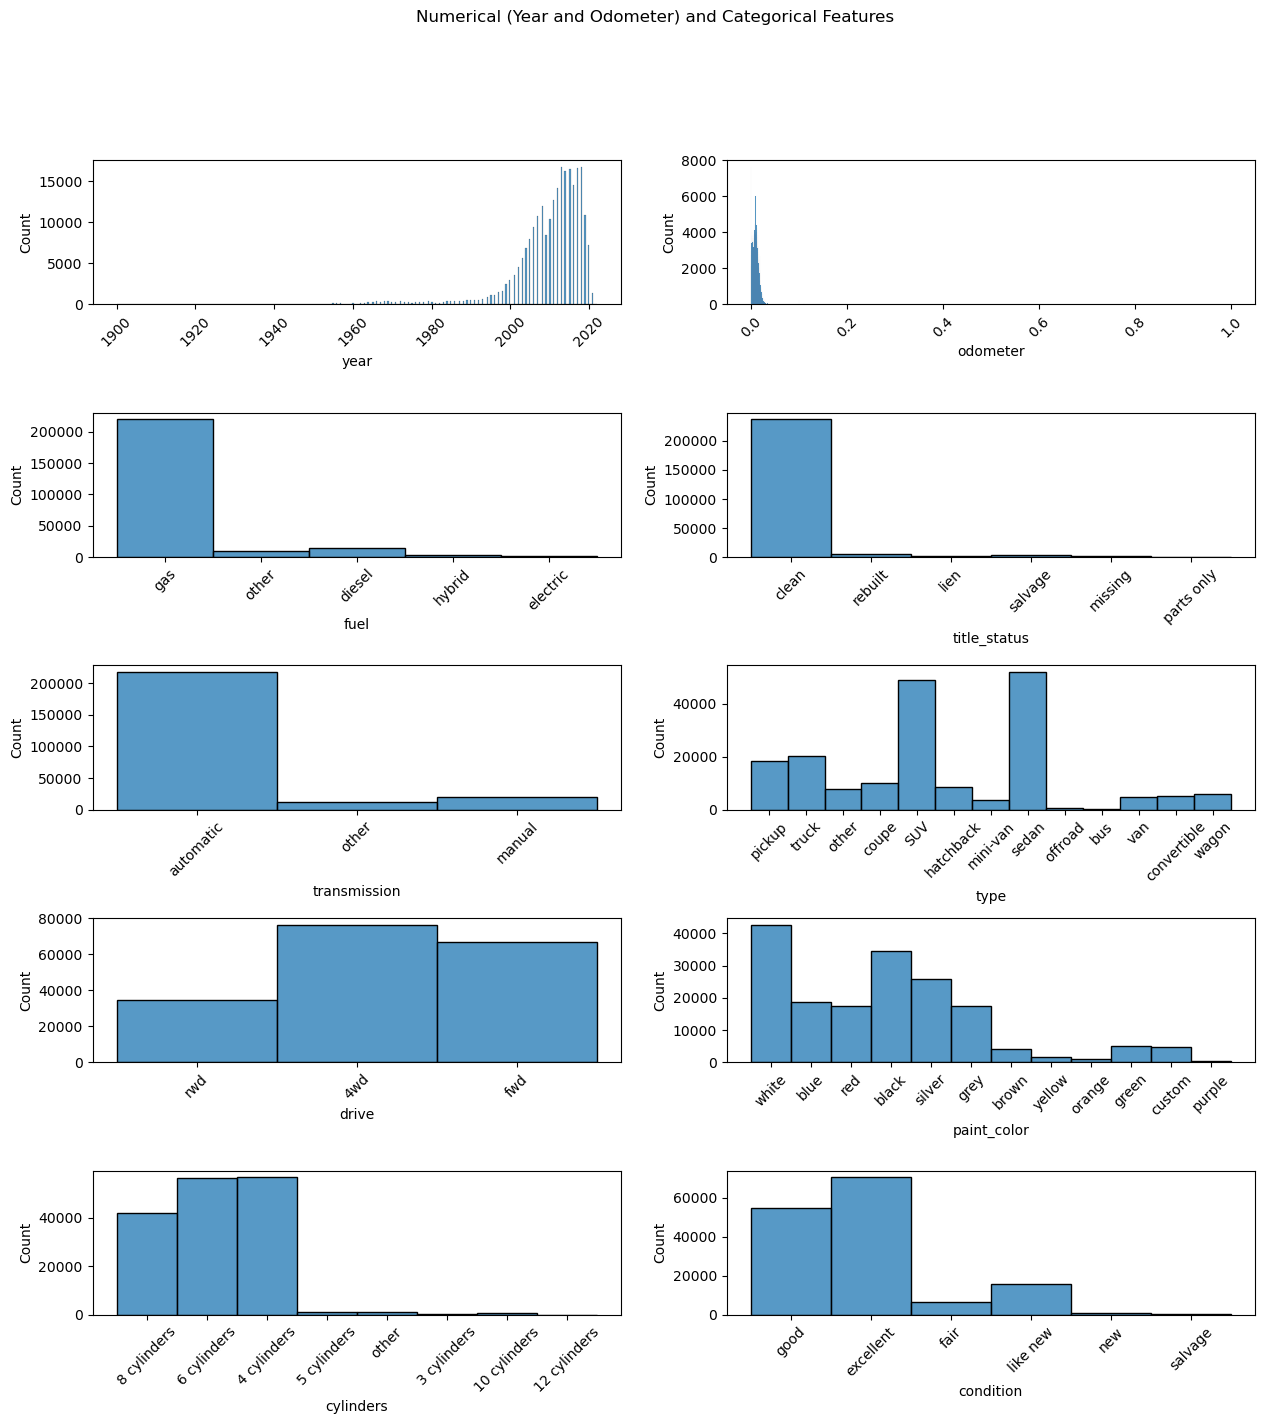

In [985]:
def plot_xby2_hist(a,b,fig_size, data, x_list):
    ctr, ctr_limit = 0, len(x_list)-1
    fig, ax = plt.subplots(a,b,figsize=fig_size)
    fig.subplots_adjust(hspace=0.75)
    fig.suptitle('Numerical (Year and Odometer) and Categorical Features')
    for i in range(0,a):
        for j in range(0,b):
            sns.histplot(ax = ax[i,j], data=data[x_list[ctr]])
            ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(), rotation=45)
            ctr += 1
            if ctr > ctr_limit:
                break

a,b,fig_size, data, x_list = 5,2, (15,15), df_4_init, ["year", "odometer","fuel","title_status","transmission",
                                                       "type","drive","paint_color","cylinders","condition"]
# Model was left out because it is already full of outliers...
# Manufacturer to be separated to provide better xticks view
plot_xby2_hist(a,b,fig_size, data, x_list)

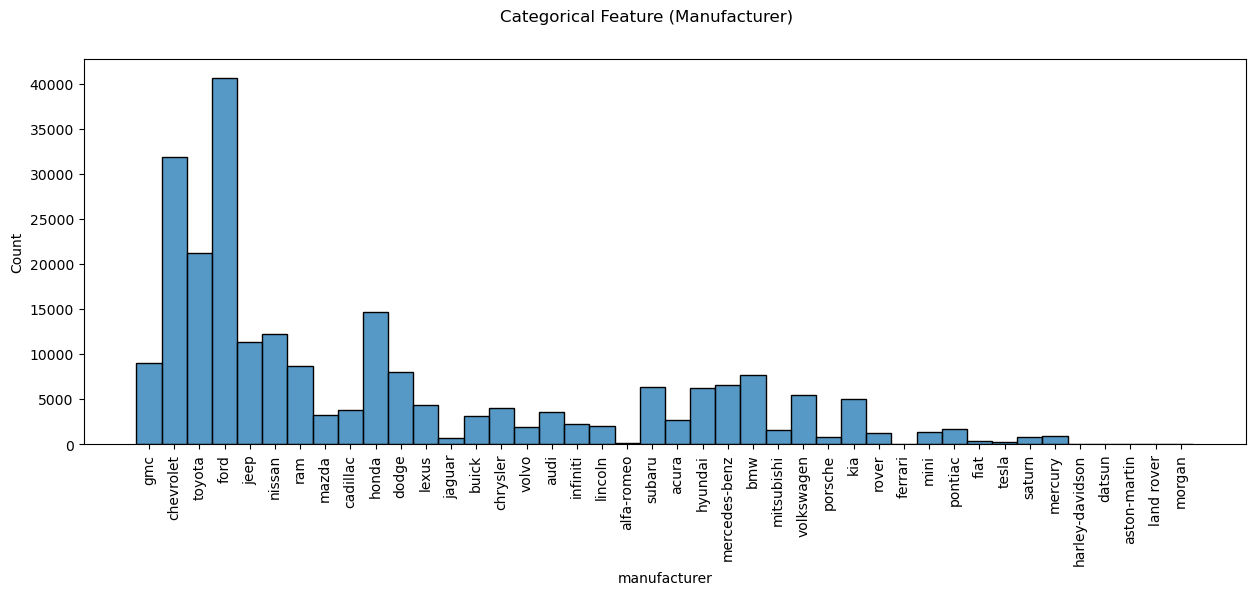

In [989]:
fig, ax_manu = plt.subplots(figsize=(15,5))
fig.suptitle('Categorical Feature (Manufacturer)')
ax_manu = sns.histplot(df_4_init['manufacturer']);
ax_manu.set_xticklabels(ax_manu.get_xticklabels(), rotation=90);


## Related with model... Get Top 10 models to impute manufacturer based on it...

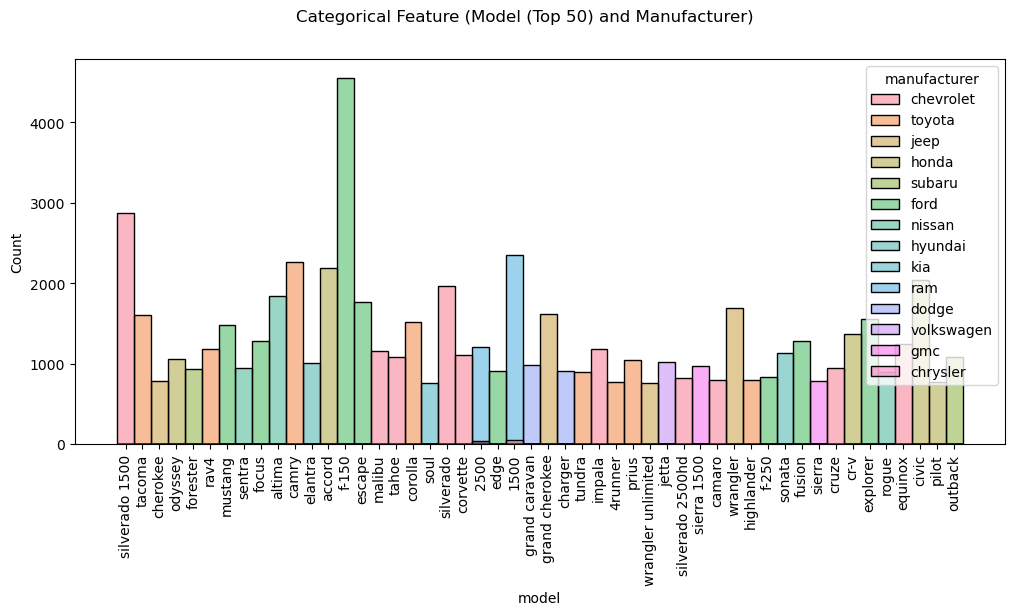

In [1001]:
##Try to inspect model and manufacturer...

model_top_50 = df_4_init['model'].value_counts().nlargest(50)
#Note that only the top 50 model values (count) have been selected here. 
#Unfortunately, there is 29k unique entries for model... 
#Cannot directly relate manufacturer and model...


# create histogram of top 50 values using seaborn
fig, ax_manu = plt.subplots(figsize=(12,5))
fig.suptitle('Categorical Feature (Model (Top 50) and Manufacturer)')
ax_model = sns.histplot(data=df_4_init[df_4_init['model'].isin(model_top_50.index)][['model','manufacturer']], x='model', discrete=True, hue='manufacturer')
ax_model.set_xticklabels(ax_model.get_xticklabels(), rotation=90);


In [992]:
##Further inspection with model and manufacturer...
## Inspect Model/Manufacturer NaN values
make_model = ['manufacturer', "model"]
mask = df_4_init[make_model].isna()

display(df_4_init[mask.any(axis=1)])

nan_filter = df_4_init[['model','manufacturer']].isna().all(axis=1)
nan_filter_True = nan_filter[nan_filter==True] 
nan_filter_True.index

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,6000,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
1,11900,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
2,21000,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
3,1500,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
4,4900,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426789,11000,2017,<NA>,ATI,like new,other,other,1,missing,other,<NA>,<NA>,brown
426815,5000,1996,<NA>,96 Suburban,excellent,8 cylinders,gas,170000,clean,automatic,<NA>,SUV,brown
426838,21900,1920,<NA>,Paige Glenbrook Touring,good,6 cylinders,gas,11065,clean,manual,rwd,other,black
426839,54999,2017,<NA>,2017,<NA>,<NA>,gas,119000,clean,automatic,<NA>,<NA>,<NA>


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,     10,     15,     16,     17,     18,     19,
                26,  30184,  40331,  63236,  70037,  80766,  80767,  80768,
             80769,  83032,  94693, 118854, 121392, 144406, 144572, 159273,
            172776, 175630, 196288, 197407, 214184, 231771, 267108, 268255,
            275017, 283644, 295053, 295054, 295055, 295056, 295057, 295058,
            331001, 332728, 368797, 375886, 402274, 410619],
           dtype='int64')

In [993]:
df_5_init_dropnan_makemode = df_4_init.drop(index=nan_filter_True.index)
df_5_init_dropnan_makemode.shape

print(f'Data loss if model/manu with NaN is removed =  {(100-(100*((248099-54)/248099))):.2f}%')

Data loss if model/manu with NaN is removed =  0.02


In [994]:
df_5_init_dropnan_makemode

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
27,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,<NA>,pickup,white
28,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,<NA>,pickup,blue
29,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,<NA>,pickup,red
30,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,<NA>,pickup,red
31,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426833,6800,1997,jaguar,xk8 convertible,good,8 cylinders,gas,69550,clean,automatic,rwd,convertible,white
426838,21900,1920,<NA>,Paige Glenbrook Touring,good,6 cylinders,gas,11065,clean,manual,rwd,other,black
426839,54999,2017,<NA>,2017,<NA>,<NA>,gas,119000,clean,automatic,<NA>,<NA>,<NA>
426846,41999,2015,<NA>,2015,<NA>,<NA>,gas,126000,clean,automatic,<NA>,<NA>,<NA>


In [995]:
df_5_init_dropnan_makemode.isnull().sum().sort_values()

price               0
fuel                0
title_status        0
transmission        0
year              642
odometer         2470
model            3639
manufacturer    10793
type            62492
drive           70530
paint_color     74581
cylinders       89276
condition       98866
dtype: int64

In [ ]:
## I want to see any relationship between make and model....
## Skip for now....


Inspect numerical categories

In [996]:
# type            62492
# drive           70530
# paint_color     74581
# cylinders       89276
# condition       98866

## Year and odometer as well
df_5_init_dropnan_makemode.describe()

,price,year,odometer
count,248045.0,247403.0,245575.0
mean,113539.589966,2009.421773,112380.62146
std,15981255.059624,10.767568,250941.82645
min,0.0,1900.0,0.0
25%,4900.0,2006.0,51808.5
50%,9999.0,2012.0,99689.0
75%,19977.0,2016.0,145474.5
max,3736928711.0,2022.0,10000000.0


In [997]:
df_5_init_dropnan_makemode[df_5_init_dropnan_makemode['price']<3000]['price'].value_counts()

0       17468
2500     1955
2000     1315
1500     1264
1         929
        ...  
144         1
2099        1
2424        1
2445        1
1325        1
Name: price, Length: 1129, dtype: Int64

In [998]:
df_5_init_dropnan_makemode['price'].sort_values().nsmallest(17470)
### Inspect price that are zero

364334    0
27032     0
319006    0
27029     0
319002    0
         ..
313190    0
146793    0
107860    0
256821    1
101242    1
Name: price, Length: 17470, dtype: Int64

In [1000]:
df_5_init_dropnan_makemode.loc[364334]
## This could imply two (2) things
#1. Price could be legitimately correct 
#2. Price could be added by mistake

#For this record, price is 0 but overall, the characteristics of the car looks good...
#I am not sure if this is legit or not but this will affect my model....
#Retained price values....



price                     0
year                   1973
manufacturer         toyota
model                  fj40
condition         excellent
cylinders       6 cylinders
fuel                    gas
odometer                321
title_status          clean
transmission         manual
drive                   4wd
type                   <NA>
paint_color           green
Name: 364334, dtype: object

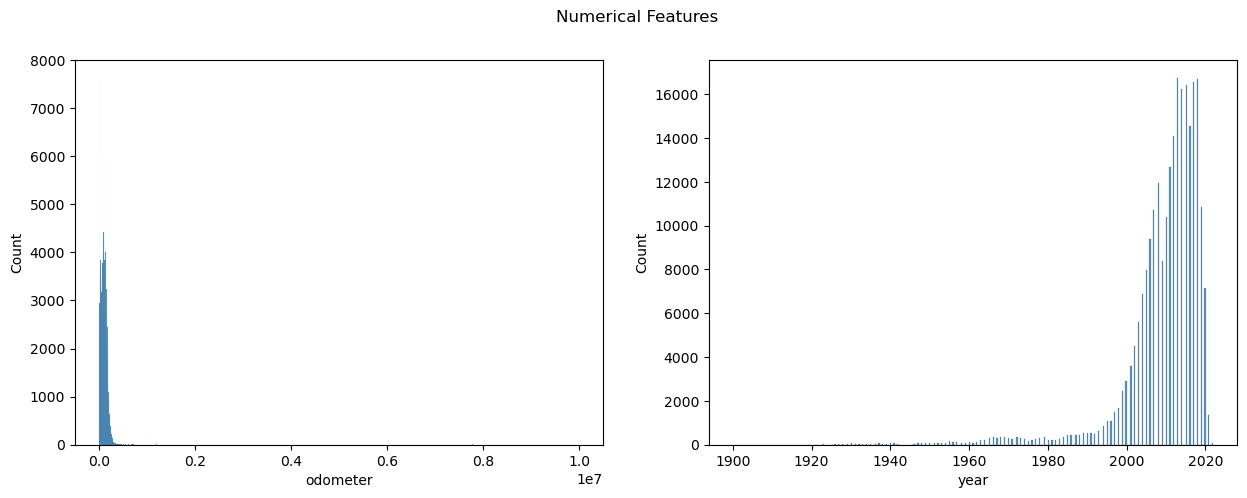

In [1002]:
#Year / Odometer check
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Numerical Features')
sns.histplot(ax = ax[0], data=df_5_init_dropnan_makemode['odometer'])
sns.histplot(ax = ax[1], data=df_5_init_dropnan_makemode['year']);

## Both are skewed......

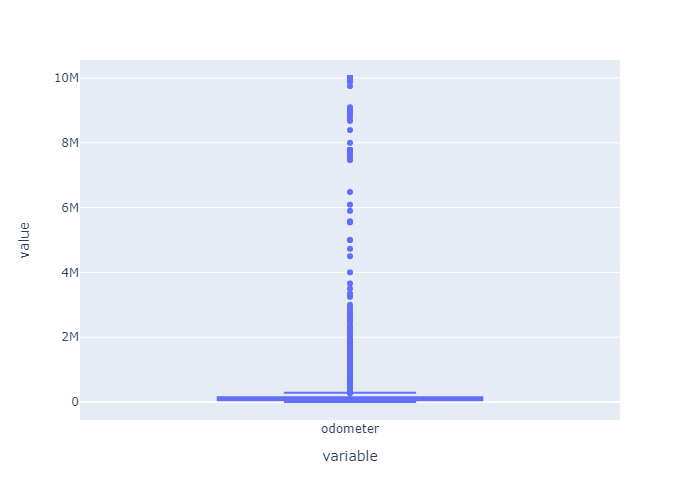

In [1014]:
## Digging further:

fig_odo = px.box(df_5_init_dropnan_makemode['odometer'])
fig_odo.show('png')

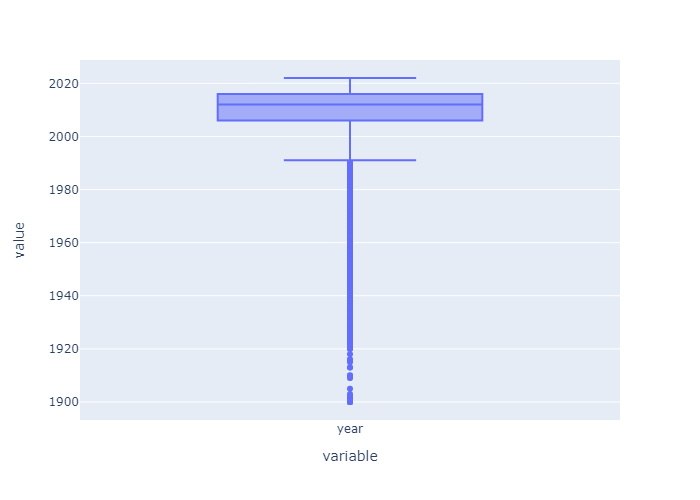

In [1015]:
fig_year = px.box(df_5_init_dropnan_makemode['year'])
fig_year.show('png')

In [1017]:
#Skipping numerical and back to Model/Manufacturer features
#############################




In [1019]:
## Recall that from df_4_init, the changes on mode/manufacturer features are not applied to try to "sanitize" it for data analysis..
df_4_init

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,6000,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
1,11900,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
2,21000,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
3,1500,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
4,4900,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426833,6800,1997,jaguar,xk8 convertible,good,8 cylinders,gas,69550,clean,automatic,rwd,convertible,white
426838,21900,1920,<NA>,Paige Glenbrook Touring,good,6 cylinders,gas,11065,clean,manual,rwd,other,black
426839,54999,2017,<NA>,2017,<NA>,<NA>,gas,119000,clean,automatic,<NA>,<NA>,<NA>
426846,41999,2015,<NA>,2015,<NA>,<NA>,gas,126000,clean,automatic,<NA>,<NA>,<NA>


In [1020]:
#Impute Manufacturer
df_9_init = df_4_init.copy()

match_str = ["freightliner", "kenworth", "peterbilt", "volvo", "mack", "international"]
#I have looked that these are some of the well known semi-truck manufacturers..

# replace row value in col2 if col1 contains match_str
for i in range(0,len(match_str)):
    df_9_init.loc[df_9_init['model'].str.contains(match_str[i]), 'manufacturer'] = match_str[i]

mask_truck_2 = df_9_init['model'].str.contains('|'.join(["freightliner", "kenworth", "peterbilt", "volvo", "mack", "international"]))
df_9_init[mask_truck_2]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
1441,55000,2002,freightliner,freightliner fl60,excellent,<NA>,diesel,110000,clean,automatic,<NA>,truck,white
2814,80000,2018,kenworth,kenworth t680,excellent,6 cylinders,diesel,395937,clean,manual,<NA>,truck,red
4350,0,2018,peterbilt,peterbilt 579,<NA>,<NA>,diesel,1,clean,automatic,<NA>,<NA>,<NA>
5003,145000,2014,freightliner,freightliner m2 106,like new,6 cylinders,diesel,17094,clean,automatic,4wd,truck,black
5708,59000,2014,international,international 4400,<NA>,<NA>,diesel,274632,clean,automatic,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424165,19500,2010,freightliner,freightliner cascadia sleeper,<NA>,<NA>,diesel,900132,clean,manual,<NA>,<NA>,white
424220,14999,2004,freightliner,freightliner m2 106,<NA>,8 cylinders,diesel,330211,clean,automatic,<NA>,truck,white
424388,65000,2017,freightliner,freightliner cascadia,<NA>,<NA>,diesel,468000,clean,manual,<NA>,<NA>,<NA>
424499,3999,1996,international,international 2554,<NA>,6 cylinders,diesel,34191,clean,other,<NA>,truck,yellow


In [1021]:
df_9_init.isnull().sum().sort_values()
# New feature entries added on manufacturer (info taken from model)

price               0
fuel                0
title_status        0
transmission        0
year              695
odometer         2523
model            3693
manufacturer    10216
type            62546
drive           70584
paint_color     74635
cylinders       89330
condition       98919
dtype: int64

In [1022]:
#Log odometer and year
df_9_init['odometer'] = np.log(df_9_init['odometer']+1) #To avoid infinity issues
df_9_init['year'] = np.log(df_9_init['year'])


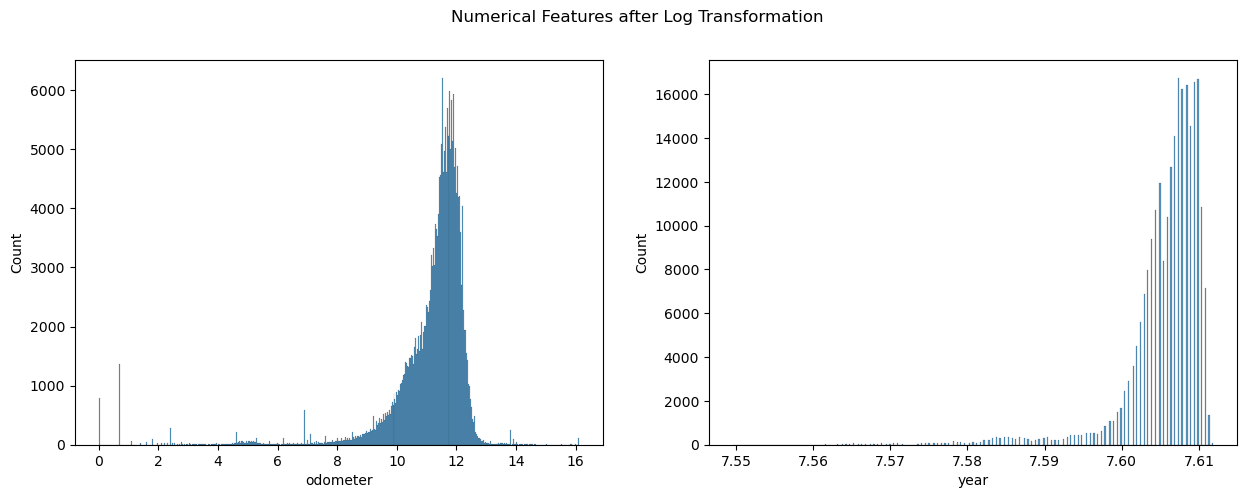

In [1025]:
#Year / Odometer check
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Numerical Features after Log Transformation')
sns.histplot(ax = ax[0], data=df_9_init['odometer'])
sns.histplot(ax = ax[1], data=df_9_init['year']);

## Both are still skewed after log transformation but not as much compared with the original data set.
## A possible outlier trimming can be done.. but retained all information here at this point..

In [1028]:
df_9_init

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,6000,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
1,11900,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
2,21000,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
3,1500,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
4,4900,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426833,6800,7.599401,jaguar,xk8 convertible,good,8 cylinders,gas,11.149816,clean,automatic,rwd,convertible,white
426838,21900,7.56008,<NA>,Paige Glenbrook Touring,good,6 cylinders,gas,9.311633,clean,manual,rwd,other,black
426839,54999,7.609367,<NA>,2017,<NA>,<NA>,gas,11.686887,clean,automatic,<NA>,<NA>,<NA>
426846,41999,7.608374,<NA>,2015,<NA>,<NA>,gas,11.744045,clean,automatic,<NA>,<NA>,<NA>


In [1029]:
df_10_init = df_9_init.dropna(subset=["year","manufacturer","model","condition","cylinders","fuel","odometer","title_status","transmission","drive","type","paint_color"],how='all')
df_10_init

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,6000,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
1,11900,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
2,21000,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
3,1500,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
4,4900,<NA>,<NA>,<NA>,<NA>,<NA>,gas,<NA>,clean,automatic,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426833,6800,7.599401,jaguar,xk8 convertible,good,8 cylinders,gas,11.149816,clean,automatic,rwd,convertible,white
426838,21900,7.56008,<NA>,Paige Glenbrook Touring,good,6 cylinders,gas,9.311633,clean,manual,rwd,other,black
426839,54999,7.609367,<NA>,2017,<NA>,<NA>,gas,11.686887,clean,automatic,<NA>,<NA>,<NA>
426846,41999,7.608374,<NA>,2015,<NA>,<NA>,gas,11.744045,clean,automatic,<NA>,<NA>,<NA>


In [1031]:
df_10_init.describe()

,price,year,odometer
count,248099.0,247404.0,245576.0
mean,113517.241686,7.605588,11.118833
std,15979515.829796,0.005405,1.575229
min,0.0,7.549609,0.0
25%,4900.0,7.603898,10.855319
50%,9999.0,7.606885,11.509821
75%,19975.5,7.608871,11.887761
max,3736928711.0,7.611842,16.118096


In [1032]:
# Merge target with train data
# create example data

# split data into train and test sets
train, test = train_test_split(df_10_init, test_size=0.3, random_state=42)

# perform target encoding on categorical columns in training data
encoder = ce.TargetEncoder(cols=["manufacturer","model","condition","cylinders",
                                 "fuel","title_status","transmission","drive","type","paint_color"])
train_encoded = encoder.fit_transform(train, train['price'])

# transform test data using the fitted target encoder
test_encoded = encoder.transform(test)



In [1033]:
train_encoded = encoder.fit_transform(train, train['price'])

In [1034]:
train_encoded.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
277792,12721,7.607878,9496.581925,13870.640845,148548.380074,148548.380074,139573.649327,11.528809,154936.172947,136782.886613,148548.380074,55585.257264,12193.33968
334636,4500,7.603898,9609.590826,8019.850679,45030.754911,10183.30435,139573.649327,11.918397,154936.172947,136782.886613,17770.372381,17517.631341,24873.07857
385437,32500,7.607878,191101.333541,27486.297913,148548.380074,148548.380074,139573.649327,10.232827,154936.172947,136782.886613,148548.380074,148548.380074,148548.380074
5842,29995,7.607878,250283.292596,148548.380074,89417.058633,298549.728236,139573.649327,10.57375,154936.172947,360776.227587,62139.170755,17229.451116,24814.858409
322130,1888,7.600902,16249.341262,3644.4,89417.058633,148548.380074,139573.649327,12.511603,154936.172947,136782.886613,218862.170503,148548.380074,148548.380074


In [1037]:
## This was added as the encoder process added a value to NaN values - which would then be imputed using the Iterative Imputer
replace_nan_train = train_encoded.copy()
replace_nan_train = replace_nan_train.replace(148548.38007358825, np.nan) #53389.02206390527 value of NaN value
replace_nan_test = test_encoded.copy()
replace_nan_test = replace_nan_test.replace(148548.38007358825, np.nan) #53389.02206390527 value of NaN value


In [1039]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Load your dataset into a pandas dataframe
# Assume the dataframe is called `df` and has missing values

# Select the columns you want to impute missing values for
cols_to_impute = ["year","manufacturer","model","condition","cylinders","fuel","odometer",
                  "title_status","transmission","drive","type","paint_color"]

# Create an instance of the iterative imputer
imputer = IterativeImputer(estimator=BayesianRidge(), min_value=0.0)

# Fit the imputer to your data and transform the missing values
replace_nan_train[cols_to_impute] = imputer.fit_transform(replace_nan_train[cols_to_impute])
replace_nan_test[cols_to_impute] = imputer.fit_transform(replace_nan_test[cols_to_impute])

In [1040]:
replace_nan_train.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
count,173669.0,173669.000000,1.736690e+05,1.736690e+05,1.736690e+05,173669.000000,173669.000000,173669.000000,173669.000000,173669.000000,173669.000000,173669.000000,1.736690e+05
mean,148548.380074,7.605596,1.529893e+05,1.364914e+05,1.134477e+05,125056.375913,148548.380074,11.118538,148548.380074,148548.380074,112346.640496,68970.820660,1.004145e+05
std,18909674.57141,0.005387,2.526288e+05,2.696917e+06,1.698467e+05,95523.887708,38851.380046,1.570644,29473.970882,65668.491387,80201.850430,104267.407355,1.502618e+05
min,0.0,7.549609,5.613997e+03,0.000000e+00,3.451039e+03,407.830759,11900.947145,0.000000,9784.325490,23556.051471,17770.372381,0.000000,1.219334e+04
25%,4900.0,7.603898,1.286586e+04,8.210676e+03,5.352306e+04,61274.011680,139573.649327,10.868416,154936.172947,136782.886613,17770.372381,17517.631341,2.487308e+04
50%,9999.0,7.606885,5.904857e+04,1.338089e+04,8.941706e+04,112182.534325,139573.649327,11.502633,154936.172947,136782.886613,104019.475759,31543.677924,7.302660e+04
75%,19980.0,7.608871,2.152653e+05,2.272987e+04,1.078989e+05,151211.904536,139573.649327,11.884496,154936.172947,136782.886613,218862.170503,61013.863794,9.912863e+04
max,3736928711.0,7.611842,1.317162e+06,2.749868e+08,1.134293e+06,407563.024008,279664.937637,16.118096,154936.172947,360776.227587,240773.824306,426133.687837,1.060540e+06


In [1041]:
replace_nan_train.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

In [1042]:
replace_nan_test.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

In [1043]:
train_encoded_v2 = replace_nan_train.copy()
test_encoded_v2 = replace_nan_test.copy()

In [1045]:
## Log transform all categorical features (including target) to ensure normalization...

train_encoded_v2['manufacturer'] = np.log(train_encoded_v2['manufacturer'])
train_encoded_v2['model'] = np.log(train_encoded_v2['model']+1)
train_encoded_v2['condition'] = np.log(train_encoded_v2['condition'])
train_encoded_v2['cylinders'] = np.log(train_encoded_v2['cylinders']+1)
train_encoded_v2['fuel'] = np.log(train_encoded_v2['fuel'])
train_encoded_v2['title_status'] = np.log(train_encoded_v2['title_status'])
train_encoded_v2['transmission'] = np.log(train_encoded_v2['transmission'])
train_encoded_v2['drive'] = np.log(train_encoded_v2['drive'])
train_encoded_v2['type'] = np.log(train_encoded_v2['type'])
train_encoded_v2['paint_color'] = np.log(train_encoded_v2['paint_color'])

test_encoded_v2['manufacturer'] = np.log(test_encoded_v2['manufacturer'])
test_encoded_v2['model'] = np.log(test_encoded_v2['model']+1)
test_encoded_v2['condition'] = np.log(test_encoded_v2['condition'])
test_encoded_v2['cylinders'] = np.log(test_encoded_v2['cylinders']+1)
test_encoded_v2['fuel'] = np.log(test_encoded_v2['fuel'])
test_encoded_v2['title_status'] = np.log(test_encoded_v2['title_status'])
test_encoded_v2['transmission'] = np.log(test_encoded_v2['transmission'])
test_encoded_v2['drive'] = np.log(test_encoded_v2['drive'])
test_encoded_v2['type'] = np.log(test_encoded_v2['type'])
test_encoded_v2['paint_color'] = np.log(test_encoded_v2['paint_color'])

train_encoded_v2['price'] = np.log(train_encoded_v2['price']+1)
test_encoded_v2['price'] = np.log(test_encoded_v2['price']+1)

In [1049]:
train_encoded_v2

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
277792,9.451088,7.607878,9.158687,9.537602,11.555088,11.662962,11.846348,11.528809,11.950769,11.826150,11.561541,10.925673,9.408645
334636,8.412055,7.603898,9.170517,8.989800,10.715101,9.228603,11.846348,11.918397,11.950769,11.826150,9.785288,9.770963,10.121541
385437,10.389026,7.607878,12.160559,10.221479,11.595174,11.709082,11.846348,10.232827,11.950769,11.826150,11.604568,11.079267,11.512871
5842,10.308819,7.607878,12.430349,13.029781,11.401067,12.606695,11.846348,10.573750,11.950769,12.796013,11.037132,9.754375,10.119198
322130,7.543803,7.600902,9.695808,8.201221,11.401067,12.011657,11.846348,12.511603,11.950769,11.826150,12.296197,11.576422,11.532580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188598,8.881975,7.603898,12.430349,10.162374,13.941520,12.606695,12.541348,12.421188,11.950769,11.826150,12.296197,10.359128,10.988285
159851,8.2943,7.603898,9.384125,9.285725,11.892559,9.228603,11.846348,12.201065,11.950769,12.796013,12.296197,10.986904,10.121541
212079,9.11614,7.606885,11.119995,9.500510,11.517560,11.627892,11.846348,11.826100,11.950769,11.826150,12.296197,11.409507,11.551996
240568,11.599112,7.610358,14.090990,10.773142,11.401067,11.627892,12.541348,5.252273,11.950769,11.826150,9.785288,9.731377,10.988285


In [1050]:
train_encoded_v2.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
count,173669.0,173669.000000,173669.000000,173669.000000,173669.000000,173669.000000,173669.000000,173669.000000,173669.000000,173669.000000,173669.000000,1.736690e+05,173669.000000
mean,8.545784,7.605596,10.909373,9.462270,11.357691,11.242751,11.866459,11.118538,11.836725,11.816771,11.246987,-inf,11.068486
std,2.626476,0.005387,1.438085,2.070658,0.589601,1.202622,0.346954,1.570644,0.528665,0.468013,0.982246,NaN,0.898024
min,0.0,7.549609,8.633018,0.000000,8.146430,6.013301,9.384373,0.000000,9.188537,10.067138,9.785288,-inf,9.408645
25%,8.497195,7.603898,9.462333,9.013312,10.887868,11.023127,11.846348,10.868416,11.950769,11.826150,9.785288,9.770963e+00,10.121541
50%,9.21034,7.606885,10.986116,9.501658,11.401067,11.627892,11.846348,11.502633,11.950769,11.826150,11.552333,1.035913e+01,11.198579
75%,9.902537,7.608871,12.279627,10.031479,11.588950,11.926444,11.846348,11.884496,11.950769,11.826150,12.296197,1.101886e+01,11.504174
max,22.04153,7.611842,14.090990,19.432233,13.941520,12.917953,12.541348,16.118096,11.950769,12.796013,12.391613,1.296251e+01,13.874289


In [1051]:
train_encoded_v2.isnull().sum().sort_values()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

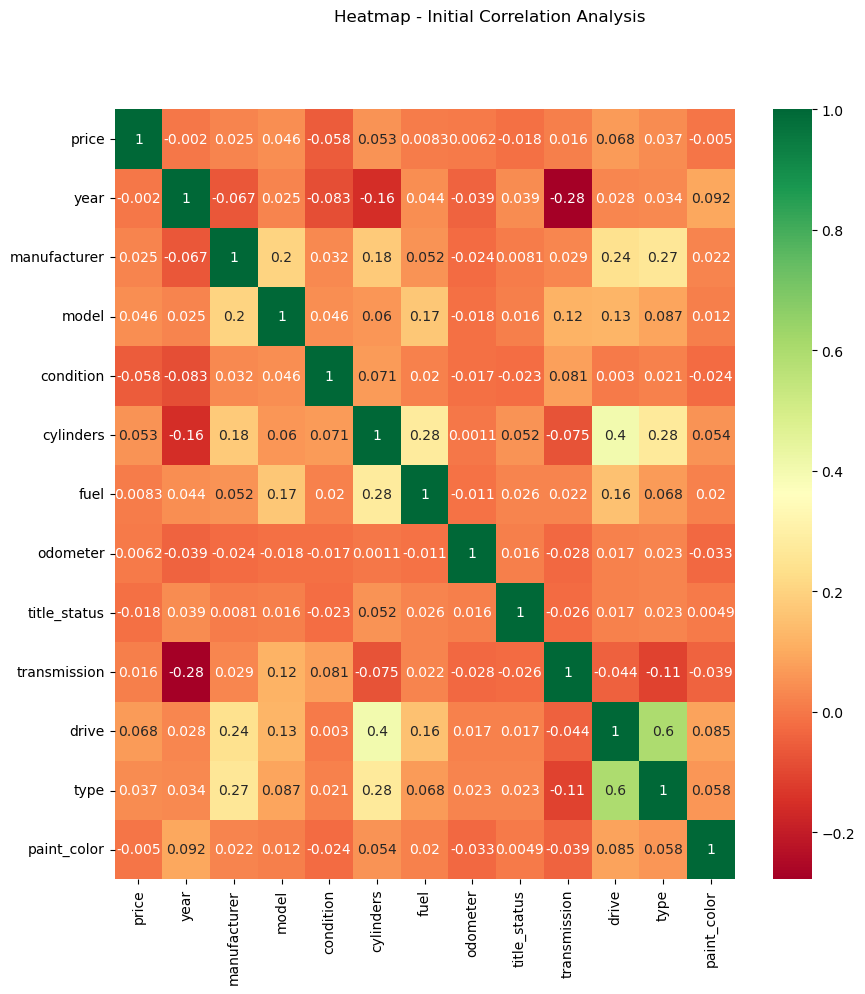

In [1052]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Heatmap - Initial Correlation Analysis')
ax = sns.heatmap(train_encoded_v2_scaled.corr(),cmap='RdYlGn', annot=True)
## No correlation (0.7 and above) for current training feature set....

In [1053]:
test_encoded_v2.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
count,74430.0,74430.000000,74430.000000,74430.000000,74430.000000,74430.000000,74430.000000,74430.000000,74430.000000,74430.000000,74430.000000,7.443000e+04,74430.000000
mean,8.562577,7.605575,10.897786,9.373654,11.351459,11.243750,11.865292,11.119068,11.836707,11.817134,11.238563,-inf,11.074240
std,2.601451,0.005423,1.430073,2.316885,0.591279,1.203276,0.350503,1.559191,0.528835,0.471983,0.979971,NaN,0.896665
min,0.0,7.549609,8.633018,0.000000,8.146430,7.532344,9.384373,0.000000,9.188537,10.067138,9.785288,-inf,9.408645
25%,8.497195,7.603898,9.462333,9.012014,10.887868,11.015439,11.846348,10.859018,11.950769,11.826150,9.785288,9.770963e+00,10.121541
50%,9.21034,7.606885,10.986116,9.500510,11.401067,11.627892,11.846348,11.501839,11.950769,11.826150,11.543035,1.035913e+01,11.198579
75%,9.901285,7.608871,12.160559,10.021292,11.580916,11.934632,11.846348,11.884496,11.950769,11.826150,12.296197,1.106129e+01,11.512673
max,20.828626,7.611842,14.090990,19.432233,13.941520,13.016325,12.541348,16.118096,11.950769,12.796013,12.452305,1.296251e+01,13.874289


In [912]:
#Perform scaling outside of pipeline
scaler_train = StandardScaler()
train_encoded_v2_scaled = scaler_train.fit_transform(train_encoded_v2)
scaler_test = StandardScaler()
test_encoded_v2_scaled = scaler_test.fit_transform(test_encoded_v2)

In [913]:
train_encoded_v2_scaled = pd.DataFrame(train_encoded_v2_scaled, columns=train_encoded_v2.columns)
test_encoded_v2_scaled = pd.DataFrame(test_encoded_v2_scaled, columns=test_encoded_v2.columns)

In [868]:
test_encoded_v2_scaled.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
count,7.441400e+04,7.441400e+04,7.441400e+04,7.441400e+04,7.441400e+04,7.441400e+04,7.441400e+04,7.441400e+04,7.441400e+04,7.441400e+04,7.441400e+04,7.441400e+04,7.441400e+04
mean,4.261977e-16,9.621202e-14,-7.308429e-16,-2.221222e-17,-4.189981e-15,5.120722e-15,-4.447886e-15,-2.188518e-16,1.341212e-14,-1.226410e-15,-2.393453e-15,1.163128e-15,4.916288e-15
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.262350e+00,-1.037770e+01,-1.466351e+00,-3.265170e+00,-3.376384e+00,-2.329759e+01,-2.687217e+00,-7.220362e+00,-6.857512e+00,-4.063535e-01,-1.350796e+00,-1.910917e+00,-1.403219e+00
25%,-2.028224e-02,-3.156051e-01,-7.160344e-01,1.162894e-02,-9.195376e-01,-3.320998e-01,-2.877716e-01,-1.697861e-01,2.129041e-01,-3.202529e-01,-1.249592e+00,-1.077248e+00,-9.343120e-01
50%,2.518155e-01,2.379361e-01,-2.584019e-01,1.695125e-01,-3.442975e-01,-1.568895e-01,-2.877716e-01,2.433271e-01,2.129041e-01,-3.202529e-01,-2.497304e-02,2.062007e-01,4.066879e-02
75%,5.153851e-01,6.060472e-01,4.063502e-01,3.325367e-01,3.979287e-01,6.152046e-01,-2.877716e-01,4.909366e-01,2.129041e-01,-3.202529e-01,1.240555e+00,9.337193e-01,3.153559e-01
max,5.147501e+00,1.156847e+00,3.589849e+00,3.566893e+00,7.991802e+00,2.460280e+00,3.039745e+00,3.237923e+00,2.129041e-01,3.424711e+00,1.095011e+01,7.501719e+00,6.611663e+00


In [914]:
## VIF

def vif(cols,data):
    
    vif_dict = {}
    # Loop to separate one feature from the rest per iteration
    for col in cols:
        not_col = [i for i in cols if i != col ]
        X, y = data[not_col], data[col]
        
        # calculate r_squared
        r_squared = LinearRegression().fit(X,y).score(X,y)
        # calculate VIF
        vif = (1 / (1 - r_squared))
        vif_dict[col] = vif
    
    return pd.DataFrame({'VIF':vif_dict})

In [915]:
X_vif_test = X_train.copy()
vif(X_vif_test.columns, X_vif_test).sort_values(by='VIF',ascending=False)
## IVF test shows that features does not have multicolinearity (VIF value of 5 and above)

,VIF
drive,1.765303
type,1.625241
cylinders,1.363705
year,1.166486
transmission,1.127279
manufacturer,1.105705
fuel,1.101869
paint_color,1.018686
condition,1.018002
odometer,1.006618


In [871]:
X_train = train_encoded_v2_scaled.drop(columns=['price','model'])
y_train = train_encoded_v2_scaled['price']

X_test = test_encoded_v2_scaled.drop(columns=['price','model'])
y_test = test_encoded_v2_scaled['price']


## Model has been dropped to reduce complexity... based on initial assessment..

len(set(df_4_init['model'])) #As there are 24820 unique models....

29650

In [823]:
X_train.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,0.240563,0.159901,-0.350731,-0.087803,-0.283662,0.700882,0.212822,-0.319442,-0.506068,-1.088962,-1.146046
1,0.516456,-0.263532,-0.940960,-1.357836,-0.283662,0.206215,0.212822,-0.319442,-1.274096,-1.088962,-1.146046
2,-0.682059,0.395684,-0.350731,1.654825,-0.283662,0.603224,0.212822,-0.319442,1.227414,0.895742,0.433956
3,0.240563,-0.396503,-0.940960,-1.357836,-0.283662,0.327445,0.212822,-0.319442,1.227414,1.371727,-0.200892
4,0.975366,-0.717353,1.012825,-1.357836,-0.283662,-1.529311,0.212822,-0.319442,-1.274096,-1.598336,-1.118731


In [829]:
## Initial SFS 
sfs = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5, scoring='neg_mean_squared_error')
sfs.fit(X_train, y_train)
filtered_columns = sfs.transform(X_train)

In [830]:
filtered_columns_df = pd.DataFrame(filtered_columns, columns=sfs.get_feature_names_out())
filtered_columns_df.head()

,condition,cylinders,title_status,transmission,drive
0,-0.350731,-0.087803,0.212822,-0.319442,-0.506068
1,-0.940960,-1.357836,0.212822,-0.319442,-1.274096
2,-0.350731,1.654825,0.212822,-0.319442,1.227414
3,-0.940960,-1.357836,0.212822,-0.319442,1.227414
4,1.012825,-1.357836,0.212822,-0.319442,-1.274096


In [851]:
train_encoded_v2.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
count,173632.0,173632.000000,173632.000000,1.736320e+05,173632.000000,173632.000000,173632.000000,173632.000000,173632.000000,173632.000000,173632.000000,173632.000000,173632.000000
mean,53389.022064,7.605585,53301.402855,3.614809e+04,31114.224246,19915.185816,53624.650010,11.114647,54064.318823,53595.631442,28962.983609,30111.513958,28744.167002
std,6265158.511396,0.005400,104273.026938,9.940881e+05,45856.409287,8677.061148,44559.308135,1.578471,8551.704112,88181.120698,12061.423418,16007.101359,19188.554820
min,0.0,7.549609,5908.546172,0.000000e+00,3352.285714,7346.238552,12049.080518,0.000000,7035.144231,23842.529952,15024.942445,8830.210834,11335.421744
25%,4900.0,7.603898,12871.172613,8.060537e+03,13919.207654,15968.839879,39306.686023,10.864350,55939.244206,27360.669537,15298.255462,14084.632903,14635.984959
50%,9999.0,7.606885,20280.438719,1.279191e+04,19425.651180,16991.401380,39306.686023,11.501318,55939.244206,27360.669537,26949.537643,29571.652197,24899.309893
75%,19980.0,7.608871,39255.868508,1.977119e+04,29926.230561,23248.329239,39306.686023,11.884496,55939.244206,27360.669537,44839.871847,43438.623448,28985.316906
max,1410065407.0,7.611842,927941.707715,1.371387e+08,307574.436230,51130.500000,202580.805367,16.118096,55939.244206,358679.795886,55338.200477,57869.247791,74039.840798


In [916]:
### Trying Lasso for feature selection:

pipeline = Pipeline([               
    ('model',Lasso())
])

lasso_search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.02,0.2,0.01)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
## Added verbose just to check the status...
X_train = train_encoded_v2_scaled.drop(columns=['price','model'])
#Temporary.

lasso_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ................model__alpha=0.02;, score=-0.965 total time=   0.0s
[CV 2/5] END ................model__alpha=0.02;, score=-1.022 total time=   0.1s
[CV 3/5] END ................model__alpha=0.02;, score=-0.983 total time=   0.0s
[CV 4/5] END ................model__alpha=0.02;, score=-0.988 total time=   0.0s
[CV 5/5] END ................model__alpha=0.02;, score=-1.002 total time=   0.0s
[CV 1/5] END ................model__alpha=0.03;, score=-0.967 total time=   0.0s
[CV 2/5] END ................model__alpha=0.03;, score=-1.023 total time=   0.0s
[CV 3/5] END ................model__alpha=0.03;, score=-0.985 total time=   0.0s
[CV 4/5] END ................model__alpha=0.03;, score=-0.989 total time=   0.0s
[CV 5/5] END ................model__alpha=0.03;, score=-1.003 total time=   0.0s
[CV 1/5] END model__alpha=0.039999999999999994;, score=-0.969 total time=   0.0s
[CV 2/5] END model__alpha=0.039999999999999994;,

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', Lasso())]),
             param_grid={'model__alpha': array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])},
             scoring='neg_mean_squared_error', verbose=3)

In [917]:
lasso_search.best_params_
coefficients = lasso_search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

In [918]:
importance

array([0.        , 0.        , 0.03929352, 0.01993667, 0.        ,
       0.        , 0.00025477, 0.00209693, 0.03970077, 0.        ,
       0.        ])

#### The remaining parameters matches with the initial SFS method results

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [919]:
#Filter initial features to be added/trained/iterated in the pipeline/gridsearchcv object
X_train = train_encoded_v2_scaled[["condition","cylinders","title_status","transmission","drive"]]
y_train = train_encoded_v2_scaled['price']

X_test = test_encoded_v2_scaled[["condition","cylinders","title_status","transmission","drive"]]
y_test = test_encoded_v2_scaled['price']

In [783]:
## Run 1

In [784]:
# ignore all warnings
warnings.filterwarnings('ignore')

start_time = time.time()

# Define the pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('sfs1', SequentialFeatureSelector(estimator=LinearRegression())),
    ('model', Ridge())
])

# Define the hyperparameters to search
param_grid = {
    'poly__degree': [1, 2, 3],
    'sfs1__n_features_to_select': [3, 4],
    'model__alpha': [10, 0, 0.1, 0.01]
}


# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

result = sum(range(1000000))

end_time = time.time()

print("Elapsed time:", end_time - start_time)

### Don't RUN


Best parameters: {'model__alpha': 100, 'poly__degree': 3, 'sfs1__n_features_to_select': 5}
Best score: -0.983103779567644
Elapsed time: 27898.306775808334


In [938]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('sfs1',
                                        SequentialFeatureSelector(estimator=LinearRegression())),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [100, 10, 0, 0.1, 0.01],
                         'poly__degree': [1, 2, 3],
                         'sfs1__n_features_to_select': [3, 4, 5]},
             scoring='neg_mean_squared_error')

In [ ]:
## Run 2 - After optimizing hyperparameters and reviewing data set

In [920]:
# ignore all warnings
warnings.filterwarnings('ignore')

start_time = time.time()

# Define the pipeline
pipe_ridge = Pipeline([
    ('poly', PolynomialFeatures()),
    ('sfs1', SequentialFeatureSelector(estimator=LinearRegression())),
    ('model', Ridge())
])

# Define the hyperparameters to search
param_grid = {
    'poly__degree': [1, 2, 3],
    'sfs1__n_features_to_select': [3, 4],
    'model__alpha': [100, 0, 0.01]
}


# Perform a grid search to find the best hyperparameters
grid_search_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search_ridge.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search_ridge.best_params_)
print("Best score:", grid_search_ridge.best_score_)

# Evaluate the model on the test set
# y_pred = grid_search.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Test MSE:", mse)

result = sum(range(1000000))

end_time = time.time()

print("Elapsed time:", end_time - start_time)


Best parameters: {'model__alpha': 100, 'poly__degree': 3, 'sfs1__n_features_to_select': 4}
Best score: -0.9873754095247824
Elapsed time: 1392.656826019287


In [939]:
grid_search_ridge

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('sfs1',
                                        SequentialFeatureSelector(estimator=LinearRegression())),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [100, 0, 0.01],
                         'poly__degree': [1, 2, 3],
                         'sfs1__n_features_to_select': [3, 4]},
             scoring='neg_mean_squared_error')

In [1070]:
#Hold out cross validation
y_pred = grid_search_ridge.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print("Test MSE:", mse)



Test MSE: 0.5962240401620559


In [1060]:
best_model = grid_search_ridge.best_estimator_.named_steps['model']
print('Best model coefficients:', best_model.coef_)

Best model coefficients: [-0.05614311  0.04209613  0.01194092  0.04234781]


In [1068]:
poly_features = grid_search_ridge.best_estimator_.named_steps['poly']
poly_feature_names = poly_features.get_feature_names_out()

In [1067]:
selected_indices = grid_search_ridge.best_estimator_.named_steps['sfs1'].transform([poly_feature_names])[0]
print('Selected feature indices:', selected_indices)

Selected feature indices: ['condition' 'cylinders^2' 'cylinders^3' 'drive^3']


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The following are my findings that can potentially improve my model and other useful information that I can share with the client:
    
##### A. Internal Findings
1. The use of a powerful machine to run slightly complex models is a must to ensure processing speed
    - I have seen that my CPU and memory average at 100 and 90% respectively
2. We can revisit a better way to handle the following:
    - Maybe there is a more robust way to relate features that have thousands of unique entries to the data set
    - Maybe we can incorporate some items that I did with my **2nd attempt** with the **1st attempt** to further performance
        - Such as outlier trimming, pipeline instantiation, and others
3. Based on the final model, the most crucial features that determine the price are:
    - `condition`
    - `cylinders`
    - `drive`
4. I have selected an evaluation metric MAE to remove any bias related with outliers.
    - Mean Absolute Error (MAE) is a metric used to evaluate the performance of a regression model. It measures the average absolute difference between the predicted values and the true values. The lower the MAE, the better the model's performance, as it indicates that the model's predictions are closer to the true values.
    - `Best Model MAE: 0.596`
    
##### B. Client Information
1. I found that certain `price` entries is a bit ambiguous such that the cost is less than the normal value
    - Some values only between 1-3 digit values
2. The way the client record model is not the greatest
    - Unique models values is about 29k
    - Most of these are misspelled, a repetition of the manufacturer, NaN but has a manufacturer information, or incorrectly labeled
    - Some details from the manufacturer feature are missing but is found under model
3. I have seen that each state/region's car sales pricing is standardized
    - I am not sure if this is expected or not
4. VIN entries are duplicated
    - With this, some fields will be, in effect, not as useful
5. There is an interesting group that was not properly documented which are related to semi trucks
    - This could be strongly related to manufacturer, model, and odometer readings that have very high values

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Here is the summary report that can be provided to the client:
    
Goal: To determine the best parameters that will be used in creating an optimum model that will predict the appropriate value for used cars
    
Based on the results of this analysis, we can conclude that the model is able to predict the price of vehicles based on the following metrics with a minimal degree of error.
    - `condition`
    - `cylinders`
    - `drive`

The following are the recommendations that can be used moving forward:
1. Use the metrics obtained from the model to perform car pricing initiatives within the organization
   - A simple formula can be obtained which are as follows:
      
  `price_pred = 'condition'*(-0.05614311) +  'cylinders^2'*(0.04209613) + 'cylinders^3'*(0.01194092) + 'drive^3'*(0.04234781)`
    
    
   - Note that the variables `condition`, `cylinders`, and `drive` should be numerically represented which can be taken from the analysis
    
2. To improve future models, investment on data management must be considered
   - Price information has to be cleaned up as some values are only between 1-3 digit values
   - Cnsider improving data related to semi trucks to improve pricing predictions for this group accordingly
   - Ensure that the models feature needs to be standardized accordingly considering its 29k unique entries